In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

from scipy.stats import multivariate_normal as mvn

In [2]:
VIP_Test = pd.read_csv('VIP_Test.csv')
VIP_Train = pd.read_csv('VIP_Train.csv')

# EDA

## Training set

In [3]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0
34998,7991148,28.171643,1,banktransfer,41.0,GG,M,First_Deposit,0


In [4]:
#checking for unique values in the 'VIP' column in the training set
VIP_Train['VIP'].unique()

array([0, 1], dtype=int64)

In [5]:
#get counts for each unique value in the 'VIP' column
VIP_Train['VIP'].value_counts()

VIP
0    32281
1     2719
Name: count, dtype: int64

In [6]:
#how many unique player id's are there
len(VIP_Train['Player_Id'].unique())

35000

In [7]:
#check for NaN
checking_NaN = VIP_Train.isnull().values.any() 
checking_NaN

True

In [8]:
#locate rows where null values appear
NaN_rows = VIP_Train[VIP_Train.isnull().any(axis=1)]
NaN_rows

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
17,5677756,0.000000,0,dineromail,32.0,NaN,F,First_Deposit,0
71,5237723,67.121977,18,s_trustmarque,43.0,NaN,M,First_Deposit,0
103,4953917,0.000000,0,poli,36.0,TN,M,NaN,0
114,2440105,51.030622,1,ecopayz,NaN,FO,M,Sign Up,0
125,5484492,0.000000,0,clearchex,20.0,MZ,M,NaN,0
...,...,...,...,...,...,...,...,...,...
34900,7123938,0.000000,0,lateralpayments,30.0,MG,?,NaN,0
34943,5079126,79.554792,22,ppprepaidcard,30.0,NaN,F,First_Deposit,0
34947,5059554,34.929140,2,NaN,36.0,ET,M,Re-deposit,0
34958,3328480,0.000000,0,ewire,23.0,ZA,NaN,Sign Up,0


In [9]:
#locate columns where null values appear
NaN_columns = VIP_Train.isna().any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method          True
Age                     True
Country                 True
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

In [10]:
#how many rows in Deposit_features column have NaN values
VIP_Train.Deposit_Method.isnull().values.ravel().sum()


331

In [11]:
#how many rows in Deposit_features column have NaN values
VIP_Train.Age.isnull().values.ravel().sum()


359

In [12]:
#how many rows in Deposit_features column have NaN values
VIP_Train.Country.isnull().values.ravel().sum()

353

In [13]:
#how many rows in Deposit_features column have NaN values
VIP_Train.Gender.isnull().values.ravel().sum()

351

In [14]:
#how many rows in Deposit_features column have NaN values
VIP_Train.Dim_Alert_Type_Desc.isnull().values.ravel().sum()

369

In [15]:
#delete all rows that contain NaN values in any cell
VIP_Train.dropna(axis=0, how='any', subset=None, inplace=True)  

In [16]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0


In [17]:
#check to see that all rows containing NaN values have been dropped 
VIP_Train.isnull().values.any() 

False

In [18]:
#find all unique values from the 'Gender' column
VIP_Train['Gender'].unique()

array(['?', 'F', 'M'], dtype=object)

In [19]:
VIP_Train['VIP'].unique()

array([0, 1], dtype=int64)

In [20]:
#print the rows where '?' appear
print_None_rows = VIP_Train[VIP_Train.eq('?').any(axis=1)]  
print_None_rows.shape

(8252, 9)

In [21]:
#locate columns where '?' appear
NaN_columns = VIP_Train.eq('?').any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method         False
Age                    False
Country                False
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

## 'Deposit_Method' column

In [22]:
#how many unique deposit methods are there
len(VIP_Train['Deposit_Method'].unique()), VIP_Train['Deposit_Method'].unique()

(154,
 array(['v3_ebs', 'instadebitviasc', 'ifund-smooth-usd', 'diners',
        'lateralpayments', 'v_d_usd_cqr_es', 'pcard', 'paybox', 'viva',
        'ipay', 'v_trustmarque', 'metacharge_creditcard', 'debitcard',
        'netdirect3', 'firepay', 'ricarica', 'sc-sandhirst',
        'giropay_xpay', 'metacharge_debitcard', 'directdebit', 'dk_mb',
        'cardportalpago_creditcard', 'ipsprocessing', 'gvcser3dtrx',
        'ifund-smooth-eur', 'visa_postepay', 'firstgate_firstgate',
        'bt_cashservices', 'ekonto', 'clicknbuy', 'canadianeft', 'ukash',
        'entropay', 'wire', 'giropayviasc', 'paysafecardviasc',
        'muchbetter', 'webmoney', 'ebs', 'sc-gvccashier',
        'paysafecard_paysafecard', 'macaucashdesk', 'webmoneyviasc',
        'paypal_paypal', 'westernunion', 'przelewy24', 'instantbanking',
        'gvcserregulartrx', 'natwest_bankwire', 'webpay', 'ewi',
        'cyberplat', 'payr', 'v5_ebs', 'multibanco', 'ecopayz',
        'clearchex', 'neteller', 'ifund-interpa

In [23]:
# get counts of each deposit method
VIP_Train['Deposit_Method'].value_counts()

Deposit_Method
servipag            264
ebs-3d-smooth       252
maestro             247
ekonto              245
ifund-interpay      245
                   ... 
instantbank         191
gvcser3dtrx         186
gvcserregulartrx    185
pgclubcashier       182
cqr_banktransfer    172
Name: count, Length: 154, dtype: int64

### Label encoding 'Deposit_Method' because there are 154 unique Deposit methods; too many to one hot encode

In [24]:
#create another category called 'Deposit_Method_encoded' which contains the encoded Deposit Methods. The coding of labels is done in alphabetical order
VIP_Train['Deposit_Method_encoded'] = VIP_Train['Deposit_Method'].astype('category').cat.codes    #The Deposit Methods in 'Deposit_Method' are coded from 0 to 153 in alphabetical order


In [25]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77
...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98


In [26]:
#to get the labels from the coded Deposit_Method_encoded categories
c = VIP_Train.Deposit_Method.astype('category') #create a new variable 'c', which is just the 'Deposit_Method' column from the VIP_Train dataframe, as a category
d = dict(enumerate(c.cat.categories )) #build a dictionary, 'd' of all the labels from 'c' with each one numbered in alphabetical order from 0 to 153
#VIP_Train.dtypes, VIP_Train, d

## 'Country' column

In [27]:
#how many unique countries are there
len(VIP_Train['Country'].unique())

195

In [28]:
VIP_Train['Country'].value_counts()

Country
MT    213
HN    204
CU    200
DJ    199
BN    195
     ... 
GA    143
EU    143
BG    139
AZ    138
UA    133
Name: count, Length: 195, dtype: int64

### Label encoding 'Country' because there are 195 unique countries; too many to one hot encode

In [29]:
#create another category called 'Country_encoded' which contains the encoded Countries. The coding of labels is done in alphabetical order
VIP_Train['Country_encoded'] = VIP_Train['Country'].astype('category').cat.codes    #The country labels in 'Country' are coded from 0 to 194 in alphabetical order

In [30]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91
...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181


In [31]:
#to get the labels from the coded Country_encoded categories
c = VIP_Train.Country.astype('category') #create a new variable 'c', which is just the 'Country' column from the VIP_Train dataframe, as a category
d = dict(enumerate(c.cat.categories )) #build a dictionary, 'd' of all the labels from 'c' with each one numbered in alphabetical order from 0 to 194
#VIP_Train.dtypes, VIP_Train, d

## 'Gender' column

In [32]:
#how many unique countries are there
len(VIP_Train['Gender'].unique())

3

In [33]:
VIP_Train['Gender'].value_counts()

Gender
F    15010
M    14904
?     3352
Name: count, dtype: int64

### Label encoding 'Gender' 

In [34]:
#create another category called 'Gender_encoded' which contains the encoded genders. The coding of labels is done in alphabetical order
VIP_Train['Gender_encoded'] = VIP_Train['Gender'].astype('category').cat.codes    #The gender labels in 'Gender' are coded from 0 to 2 in alphabetical order

### One hot encoding gender because there are only three categories: '?', 'M', 'F' and the categories are non-ordinal

In [35]:
Gender_encoded = pd.get_dummies(VIP_Train['Gender'], prefix = 'Gender_') #one hot encode the unique gender categories as a dataframe
VIP_Train = VIP_Train.join(Gender_encoded) #join the dataframe to the main dataframe

In [36]:
Gender_encoded

,Gender__?,Gender__F,Gender__M
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
34994,False,False,True
34995,False,False,True
34996,False,False,True
34997,False,True,False


In [37]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Gender__?,Gender__F,Gender__M
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152,0,True,False,False
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186,1,False,True,False
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108,2,False,False,True
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141,2,False,False,True
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91,2,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47,2,False,False,True
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104,2,False,False,True
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142,2,False,False,True
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181,1,False,True,False


## 'Dim_Alert_Type_Desc' column

### One hot encoding Dim_Alert_Type_Desc because there are only six categories: 'Sign up', 'Special', 'First_Deposit', 'Re-deposit', '?', 'All Deposit' and the categories are non-ordinal

In [38]:
#how many unique countries are there
len(VIP_Train['Dim_Alert_Type_Desc'].unique())

6

In [39]:
VIP_Train['Dim_Alert_Type_Desc'].value_counts()

Dim_Alert_Type_Desc
Sign Up          5634
Special          5619
First_Deposit    5562
Re-deposit       5507
?                5482
All Deposit      5462
Name: count, dtype: int64

In [40]:
Dim_Alert_Type_Desc_encoded = pd.get_dummies(VIP_Train['Dim_Alert_Type_Desc'], prefix = 'Dim_Alert_Type_Desc_') #one hot encode the unique Dim_Alert_Type_Desc categories as a dataframe
VIP_Train = VIP_Train.join(Dim_Alert_Type_Desc_encoded) #join the dataframe to the main dataframe

In [41]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,...,Gender_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,...,0,True,False,False,False,True,False,False,False,False
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,...,1,False,True,False,False,True,False,False,False,False
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,...,2,False,False,True,False,False,False,False,False,True
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,...,2,False,False,True,False,False,False,False,True,False
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,...,2,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,...,2,False,False,True,False,True,False,False,False,False
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,...,2,False,False,True,False,True,False,False,False,False
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,...,2,False,False,True,False,True,False,False,False,False
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,...,1,False,True,False,False,False,False,False,False,True


In [42]:
VIP_Train.drop(['Deposit_Method'], axis=1, inplace=True)

In [43]:
VIP_Train.drop(['Country'], axis=1, inplace=True)

In [44]:
VIP_Train.drop(['Gender'], axis=1, inplace=True)

In [45]:
VIP_Train.drop(['Dim_Alert_Type_Desc'], axis=1, inplace=True)

In [46]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,0,True,False,False,False,True,False,False,False,False
1,1001159,4871.409870,1,30.0,0,69,186,1,False,True,False,False,True,False,False,False,False
2,2405146,37.812566,3,21.0,0,67,108,2,False,False,True,False,False,False,False,False,True
3,3694261,52.722560,15,33.0,0,27,141,2,False,False,True,False,False,False,False,True,False
4,7004960,42.776558,3,55.0,0,77,91,2,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,39.0,0,75,47,2,False,False,True,False,True,False,False,False,False
34995,1709649,0.000000,0,25.0,0,86,104,2,False,False,True,False,True,False,False,False,False
34996,4947176,55.191792,3,32.0,0,73,142,2,False,False,True,False,True,False,False,False,False
34997,4296112,52.488510,13,53.0,0,98,181,1,False,True,False,False,False,False,False,False,True


In [47]:
VIP_Train.reset_index(drop=True, inplace=True)

In [48]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,0,True,False,False,False,True,False,False,False,False
1,1001159,4871.409870,1,30.0,0,69,186,1,False,True,False,False,True,False,False,False,False
2,2405146,37.812566,3,21.0,0,67,108,2,False,False,True,False,False,False,False,False,True
3,3694261,52.722560,15,33.0,0,27,141,2,False,False,True,False,False,False,False,True,False
4,7004960,42.776558,3,55.0,0,77,91,2,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,2,False,False,True,False,True,False,False,False,False
33262,1709649,0.000000,0,25.0,0,86,104,2,False,False,True,False,True,False,False,False,False
33263,4947176,55.191792,3,32.0,0,73,142,2,False,False,True,False,True,False,False,False,False
33264,4296112,52.488510,13,53.0,0,98,181,1,False,True,False,False,False,False,False,False,True


In [49]:
#contruct a PMCC matrix on the clean data
corr_matrix = VIP_Train.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
Player_Id,1.000000,0.001436,-0.000181,0.001604,0.003556,-0.012725,-0.005039,-0.002130,-0.002606,0.005954,-0.004380,-0.000245,-0.009599,0.001528,0.006547,-0.005890,0.007613
Deposit_Amount,0.001436,1.000000,0.024983,0.001703,0.245964,0.002382,0.004893,0.003780,-0.001486,-0.003172,0.004074,0.002743,-0.002437,0.003385,0.000074,-0.002751,-0.000998
Deposit_Quantity,-0.000181,0.024983,1.000000,0.002507,-0.035076,0.007529,0.002945,-0.005931,0.004715,0.002094,-0.004950,0.007188,0.002541,0.003833,-0.004364,-0.006422,-0.002690
Age,0.001604,0.001703,0.002507,1.000000,0.077643,0.001260,0.002079,-0.000670,-0.000745,0.001783,-0.001333,-0.004953,0.003716,-0.002351,0.013460,0.000649,-0.010431
VIP,0.003556,0.245964,-0.035076,0.077643,1.000000,0.013866,0.004412,0.004902,-0.006328,0.001209,0.002620,-0.005084,-0.000986,-0.003019,0.004298,-0.001091,0.005845
Deposit_Method_encoded,-0.012725,0.002382,0.007529,0.001260,0.013866,1.000000,0.000848,0.000330,0.005495,-0.007081,0.003760,0.002019,0.002978,0.006214,-0.006775,-0.007238,0.002834
Country_encoded,-0.005039,0.004893,0.002945,0.002079,0.004412,0.000848,1.000000,-0.000661,-0.006903,0.009220,-0.005048,-0.000306,-0.003256,0.012898,-0.009813,-0.004851,0.005267
Gender_encoded,-0.002130,0.003780,-0.005931,-0.000670,0.004902,0.000330,-0.000661,1.000000,-0.689198,-0.481196,0.898687,-0.002933,0.011069,0.005113,-0.008203,-0.003120,-0.001871
Gender__?,-0.002606,-0.001486,0.004715,-0.000745,-0.006328,0.005495,-0.006903,-0.689198,1.000000,-0.303530,-0.301583,0.007972,-0.007378,-0.004402,0.008355,0.000346,-0.004848
Gender__F,0.005954,-0.003172,0.002094,0.001783,0.001209,-0.007081,0.009220,-0.481196,-0.303530,1.000000,-0.816919,-0.005787,-0.005629,-0.001398,0.000679,0.003684,0.008327


# Final checks

In [50]:
#confirm that all rows where '?' appear have been encoded and or eliminated 
len(VIP_Train[VIP_Train.eq('?').any(axis=1)])  

0

In [51]:
#check for NaN
VIP_Train.isnull().values.any() 

False

In [52]:
# try turning the 'VIP' category from '0 and 1' to '1 and 2'
#VIP_Train['VIP'] += 1

In [53]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,0,True,False,False,False,True,False,False,False,False
1,1001159,4871.409870,1,30.0,0,69,186,1,False,True,False,False,True,False,False,False,False
2,2405146,37.812566,3,21.0,0,67,108,2,False,False,True,False,False,False,False,False,True
3,3694261,52.722560,15,33.0,0,27,141,2,False,False,True,False,False,False,False,True,False
4,7004960,42.776558,3,55.0,0,77,91,2,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,2,False,False,True,False,True,False,False,False,False
33262,1709649,0.000000,0,25.0,0,86,104,2,False,False,True,False,True,False,False,False,False
33263,4947176,55.191792,3,32.0,0,73,142,2,False,False,True,False,True,False,False,False,False
33264,4296112,52.488510,13,53.0,0,98,181,1,False,True,False,False,False,False,False,False,True


In [54]:
VIP_Train.dtypes

Player_Id                               int64
Deposit_Amount                        float64
Deposit_Quantity                        int64
Age                                   float64
VIP                                     int64
Deposit_Method_encoded                  int16
Country_encoded                         int16
Gender_encoded                           int8
Gender__?                                bool
Gender__F                                bool
Gender__M                                bool
Dim_Alert_Type_Desc__?                   bool
Dim_Alert_Type_Desc__All Deposit         bool
Dim_Alert_Type_Desc__First_Deposit       bool
Dim_Alert_Type_Desc__Re-deposit          bool
Dim_Alert_Type_Desc__Sign Up             bool
Dim_Alert_Type_Desc__Special             bool
dtype: object

# PCA

# Standardization of the dataframe by using mean and standard deviation

$$ X_{\text{standardized}} = \frac{X - X_{\text{mean}}}{X_{\text{standard deviation}}} $$

In [55]:
X_training = VIP_Train[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender__?', 'Gender__F', 'Gender__M', 'Dim_Alert_Type_Desc__?', 'Dim_Alert_Type_Desc__All Deposit',
                        'Dim_Alert_Type_Desc__First_Deposit', 'Dim_Alert_Type_Desc__Re-deposit', 'Dim_Alert_Type_Desc__Sign Up', 
                        'Dim_Alert_Type_Desc__Special']]

# normalise the columns 
X_training_normalised = (X_training-X_training.mean())/(X_training.std())
X_training_normalised

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,-1.519578,-0.150438,-0.040211,-0.281122,1.317095,0.979800,2.987299,-0.906736,-0.900917,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
1,-1.385335,5.049634,-0.483590,-0.395717,-0.166454,1.584939,-0.334740,1.102823,-0.900917,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
2,-0.898552,-0.142232,-0.261901,-1.427066,-0.211410,0.196679,-0.334740,-0.906736,1.109946,-0.444187,-0.443216,-0.448062,-0.445399,-0.451539,2.218135
3,-0.451597,-0.126217,1.068236,-0.051934,-1.110530,0.784020,-0.334740,-0.906736,1.109946,-0.444187,-0.443216,-0.448062,-0.445399,2.214579,-0.450816
4,0.696271,-0.136900,-0.261901,2.469142,0.013370,-0.105891,-0.334740,-0.906736,1.109946,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,1.152402,-0.120971,-0.483590,0.635632,-0.031586,-0.889012,-0.334740,-0.906736,1.109946,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
33262,-1.139691,-0.182847,-0.594435,-0.968688,0.215672,0.125486,-0.334740,-0.906736,1.109946,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
33263,-0.017193,-0.123565,-0.261901,-0.166528,-0.076542,0.801818,-0.334740,-0.906736,1.109946,-0.444187,2.256167,-0.448062,-0.445399,-0.451539,-0.450816
33264,-0.242926,-0.126468,0.846547,2.239953,0.485408,1.495948,-0.334740,1.102823,-0.900917,-0.444187,-0.443216,-0.448062,-0.445399,-0.451539,2.218135


In [56]:
X_training_normal = X_training_normalised.to_numpy()
X_training_normal

array([[-1.51957815, -0.15043784, -0.04021146, ..., -0.44539886,
        -0.45153949, -0.45081565],
       [-1.38533476,  5.04963443, -0.48359047, ..., -0.44539886,
        -0.45153949, -0.45081565],
       [-0.89855195, -0.1422322 , -0.26190097, ..., -0.44539886,
        -0.45153949,  2.21813494],
       ...,
       [-0.01719301, -0.12356482, -0.26190097, ..., -0.44539886,
        -0.45153949, -0.45081565],
       [-0.24292641, -0.12646847,  0.84654656, ..., -0.44539886,
        -0.45153949,  2.21813494],
       [ 1.03819656, -0.15258772, -0.48359047, ..., -0.44539886,
        -0.45153949, -0.45081565]])

In [57]:
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D

In [58]:
def PCA(X,dims):
  eigen_values,eigen_vectors=eig(X.T@X)
  sort_indices=np.argsort(eigen_values)
  eigen_vectors=eigen_vectors[:,sort_indices[:dims]]
  return X@eigen_vectors

- We will take the 15 features/dimensions and project them onto 2 dimensional principle components.

In [59]:
X_pcs=PCA(X_training_normal,2)

In [60]:
principal_Df = pd.DataFrame(data = X_pcs
             , columns = ['principal component 1', 'principal component 2'])

In [61]:
principal_Df.tail()

,principal component 1,principal component 2
33261,2.637148e-16,4.634199e-15
33262,2.637148e-16,4.412154e-15
33263,1.526925e-16,4.412154e-15
33264,1.083656e-15,4.194200e-15
33265,9.576042e-16,-5.912920e-15


In [62]:
from matplotlib.pyplot import cm

In [63]:
# turn the target values in the 'VIP' column from 0 to 'Not VIP' and 1 to 'VIP'
VIP_Train['VIP'].replace(0, 'Not VIP',inplace=True)
VIP_Train['VIP'].replace(1, 'VIP',inplace=True)

0        True
1        True
2        True
3        True
4        True
         ... 
33261    True
33262    True
33263    True
33264    True
33265    True
Name: VIP, Length: 33266, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
33261    False
33262    False
33263    False
33264    False
33265    False
Name: VIP, Length: 33266, dtype: bool


<Figure size 640x480 with 0 Axes>

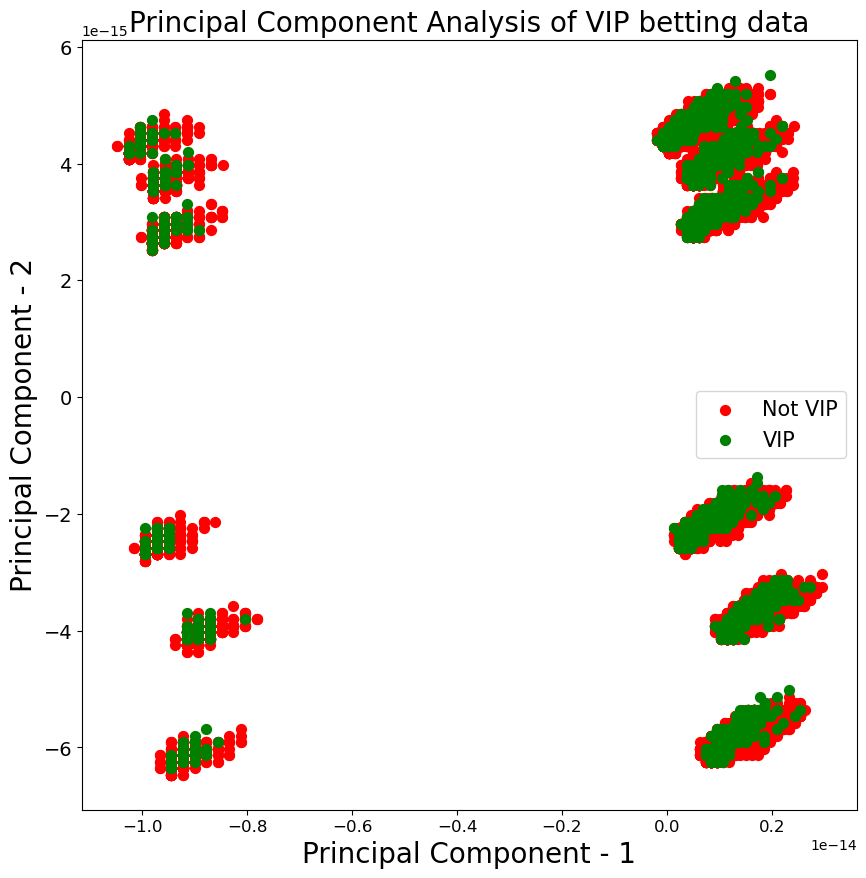

In [65]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of VIP betting data",fontsize=20)
targets = ['Not VIP', 'VIP']
colors = ['r', 'g']
#colors = cm.rainbow(np.linspace(0, 1, 1600))
for target, color in zip(targets,colors):
    indicesToKeep = VIP_Train['VIP'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
plt.legend(targets,prop={'size': 15})